In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #importing all necessary libraries
import math as mt

In [2]:
train_data=pd.read_csv("sample_data/mnist_train_small.csv") #importing train data
test_data=pd.read_csv("sample_data/mnist_test.csv") #importing test data

In [4]:
a=np.array(train_data)
b=np.array(test_data)  #converting datasets to array

In [5]:
y=np.zeros((10,19999,1))
y_train=a[0:,[0]]

In [6]:
#Here we create a 3d matrix where the first index represents class.We modify the code,so that a particular class is made as positive and all
#other classes are made negative class in a particular index
for i in range(10):
  for j in range(19999):
    if(y_train[j,0]==i):
      y[i,j,0]=1
    else:
      y[i,j,0]=0

In [7]:
x_train=a[0:,1:] #extracting x from the training dataset
y_test=b[0:,[0]] #extracting output data from test data
x_test=b[0:,1:] #extracting test x from test dataset

In [11]:
#This is the main function of our logistic regression;We take x(train data),y(train label),alpha(learning rate) and m(total samples) as input 
#and return theta(weight) as output
iterations_count=[]
cost_count=[]
def logistic_regression(x,y,alpha,iterations,m):
  theta=np.zeros((10,784,1))
  for i in range(iterations):    
    theta=theta-(alpha/m)*(np.matmul((1/(1+np.exp(-np.matmul(x,theta)))-y).transpose(0,2,1),x)).transpose(0,2,1)
    h=1/(1+np.exp(-np.matmul(x,theta)))
    cost=-(1/20000)*np.sum(np.matmul(y.transpose(0,2,1),np.log(h))-np.matmul((1-y).transpose(0,2,1),np.log(1-h)))
    iterations_count.append(i)
    cost_count.append(abs(cost))
    if (i%1000==0):
      print("The cost after ",i," iterations:",cost)
  print(abs(cost))
  return theta

In [12]:
x=np.zeros((10,19999,784)) #creating a matrix for training data
for i in range(10):
  x[i]=a[0:,1:]

In [13]:
q=logistic_regression(x,y,0.00000007,5000,19999) #Getting the value of theta from our model

The cost after  0  iterations: -5.230011090292149
The cost after  1000  iterations: 0.19507317089795054
The cost after  2000  iterations: 0.1518859227016532
The cost after  3000  iterations: 0.14106607944993452
The cost after  4000  iterations: 0.1362644125268231
0.1335466486524734


In [33]:
#Calculating the probability of the test dataset of belonging to a particular class(sigmoid function)
#The final prediction will be that class which has max probability
h=1/(1+np.exp(-np.matmul(x_test,q)))
predict=np.ones((9999,1))
for i in range(9999):
  m=[]
  for j in range(10):
    m.append(h[j,i,0])
  predict[i,0]=m.index(np.max(m))  

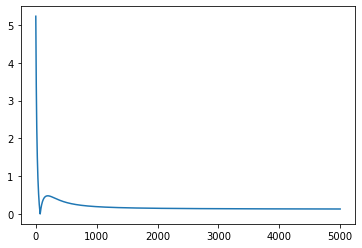

In [34]:
#A plot of cost vs number of iterations to ensure the proper working of our model
plt.plot(iterations_count,cost_count)

In [35]:
print("Actual value ","Predicted value")
for i in range(20,35):
  print(y_test[i,0],int(predict[i,0]))

Actual value  Predicted value
6 6
6 6
5 5
4 4
0 0
7 7
4 4
0 0
1 1
3 3
1 1
3 3
4 0
7 7
2 2


In [37]:
#Accuracy=((total samples-wrong predictions)/total samples)*100
count=0
for i in range(9999):
  if(y_test[i,0]!=int(predict[i,0])):
    count+=1
accuracy=((9999-count)/9999)*100
print("The accuracy of the model is:",accuracy,"%")

The accuracy of the model is: 87.21872187218722 %
